<a href="https://colab.research.google.com/github/IvanGonzal0/Proyecto3_BigData_Clustering/blob/main/Proyecto3_BigData_IvanGonzaloTapia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN

In [3]:
path = '/content/drive/MyDrive/UPSO ML & BD/DatasetCrimenes/Crimenes.csv'

In [4]:
df = pd.read_csv(path)   #cargar el archivo csv en un df
df_crimenes = df.copy()  #copia del df original
df_crimenes.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df_crimenes.tail()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [7]:
df_crimenes.describe()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<ipython-input-15-7bd659f8affc>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_crimenes['Asesinatos'], df_crimenes['Violaciones'], s=50, cmap='viridis')


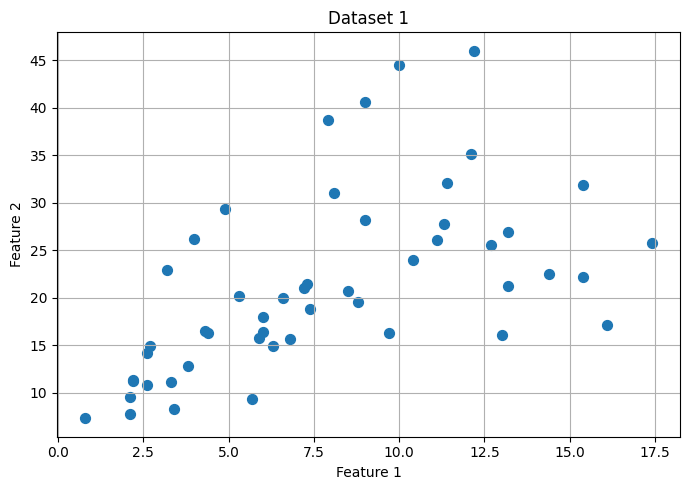

In [15]:
# Datos a visualizar

plt.figure(figsize=(7, 5))  # Cambiamos el tamaño de la figura

# Dibujar el scatter plot para data1
plt.scatter(df_crimenes['Asesinatos'], df_crimenes['Violaciones'], s=50, cmap='viridis')
plt.title('Dataset 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()

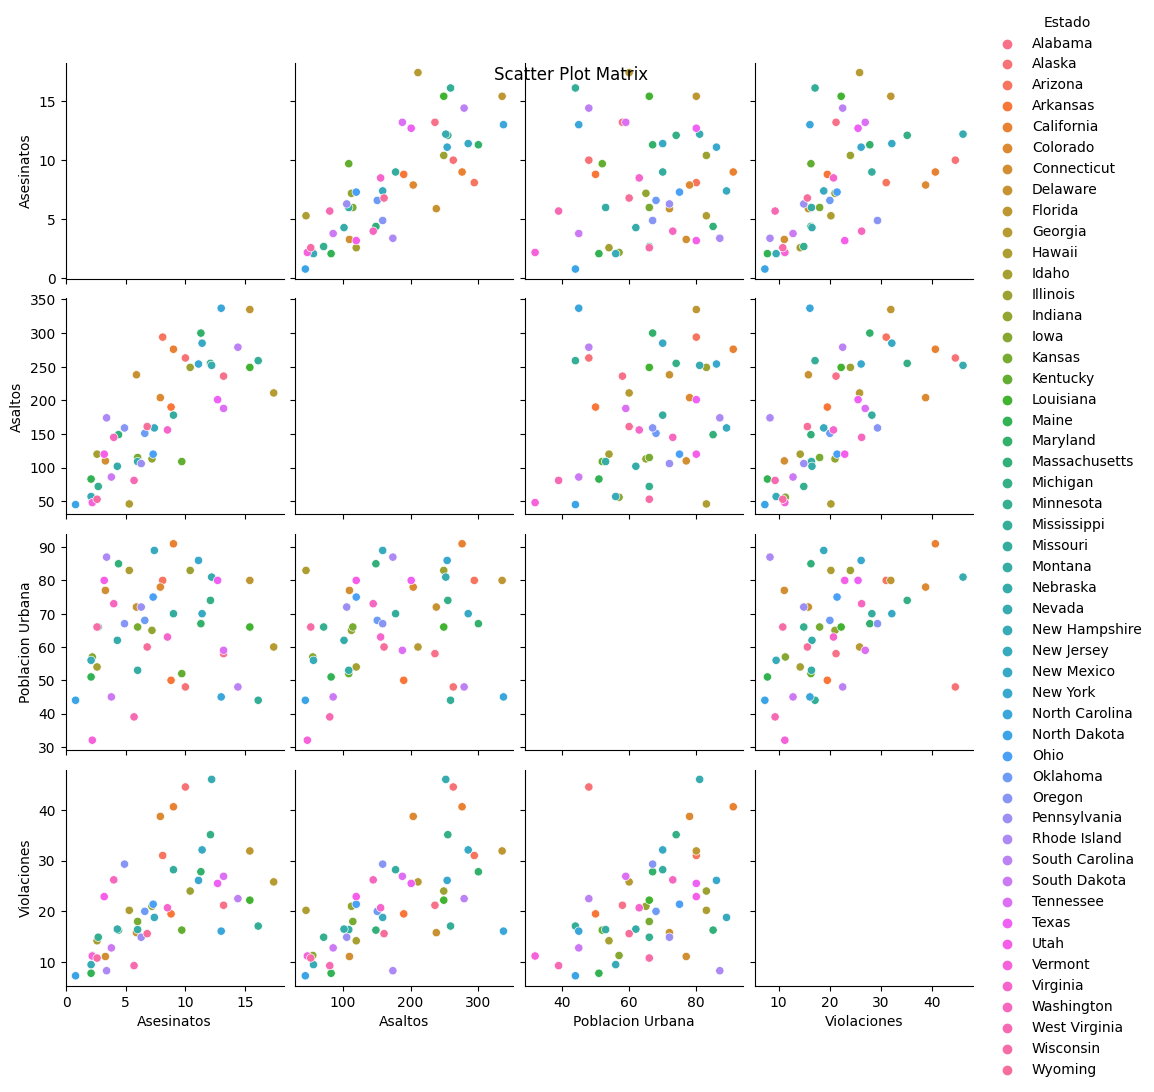

In [24]:
import seaborn as sns

custom_palette = sns.color_palette("husl", n_colors=len(df_crimenes['Estado'].unique()))
# Creo un pairplot con todas las columnas numéricas delDataFrame
sns.set_palette(custom_palette)
sns.pairplot(df_crimenes, diag_kind='kde', markers='o', hue='Estado')
plt.suptitle('Scatter Plot Matrix')
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia del LabelEncoder
label_encoder = LabelEncoder()

# Aplica la codificación a la columna 'Estado'
df_crimenes['Estado'] = label_encoder.fit_transform(df_crimenes['Estado'])
df_crimenes.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6


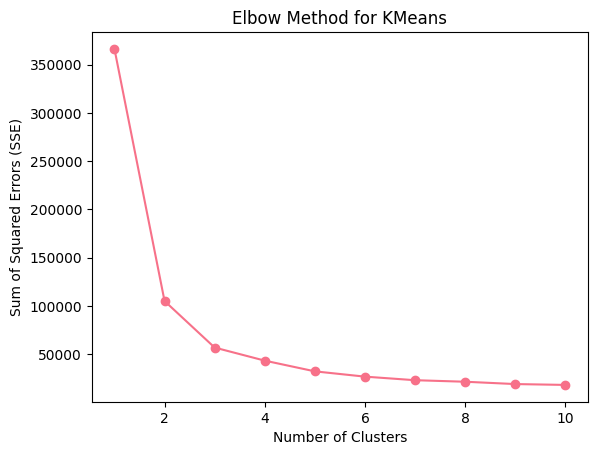

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # Sum of squared errors
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=max_k).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for KMeans")
    plt.show()

# Ejemplo:
find_optimal_clusters_kmeans(df_crimenes, 10)

In [59]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_crimenes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
df_crimenes.columns

Index(['Estado', 'Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones'], dtype='object')

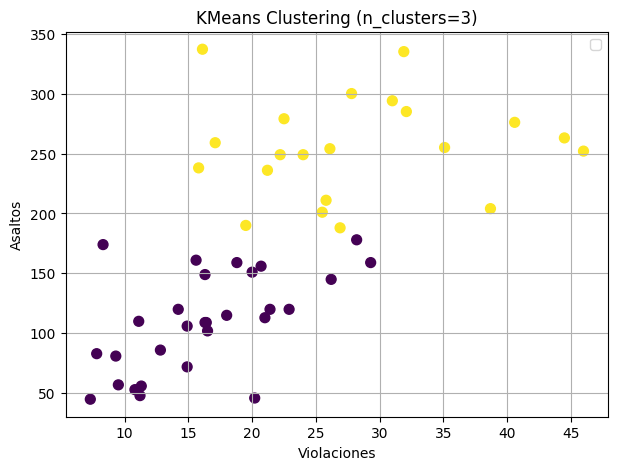

In [58]:
plt.figure(figsize=(7, 5))
plt.scatter(df_crimenes['Violaciones'], df_crimenes['Asaltos'], c=clusters, s=50, cmap='viridis')
plt.title('KMeans Clustering (n_clusters=3)')
plt.xlabel("Violaciones")
plt.ylabel("Asaltos")
plt.legend()
plt.grid(True)
plt.show()

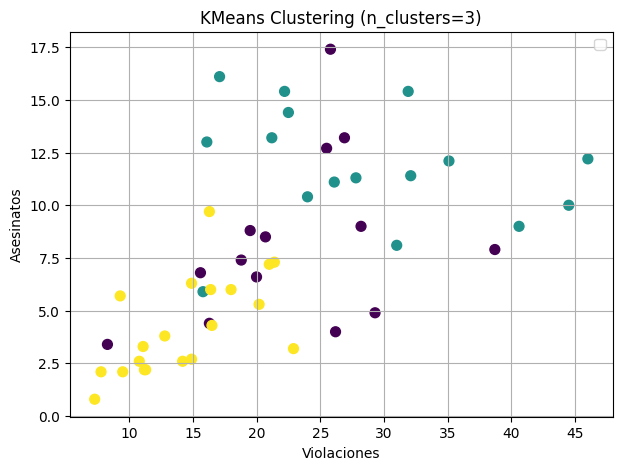

In [51]:
plt.figure(figsize=(7, 5))
plt.scatter(df_crimenes['Violaciones'], df_crimenes['Asesinatos'], c=clusters, s=50, cmap='viridis')
plt.title('KMeans Clustering (n_clusters=3)')
plt.xlabel("Violaciones")
plt.ylabel("Asesinatos")
plt.legend()
plt.grid(True)
plt.show()

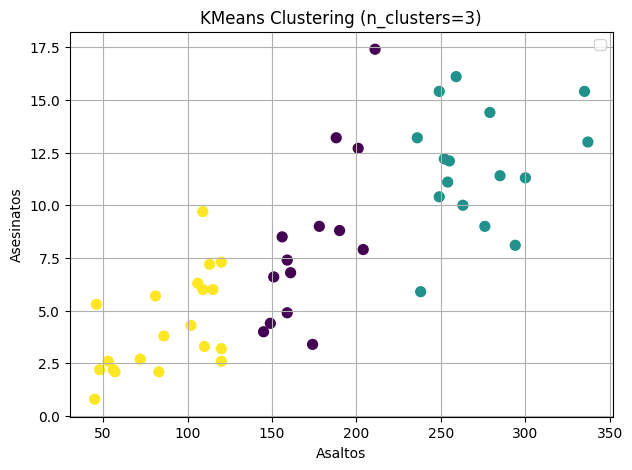

In [52]:
plt.figure(figsize=(7, 5))
plt.scatter(df_crimenes['Asaltos'], df_crimenes['Asesinatos'], c=clusters, s=50, cmap='viridis')
plt.title('KMeans Clustering (n_clusters=3)')
plt.xlabel("Asaltos")
plt.ylabel("Asesinatos")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


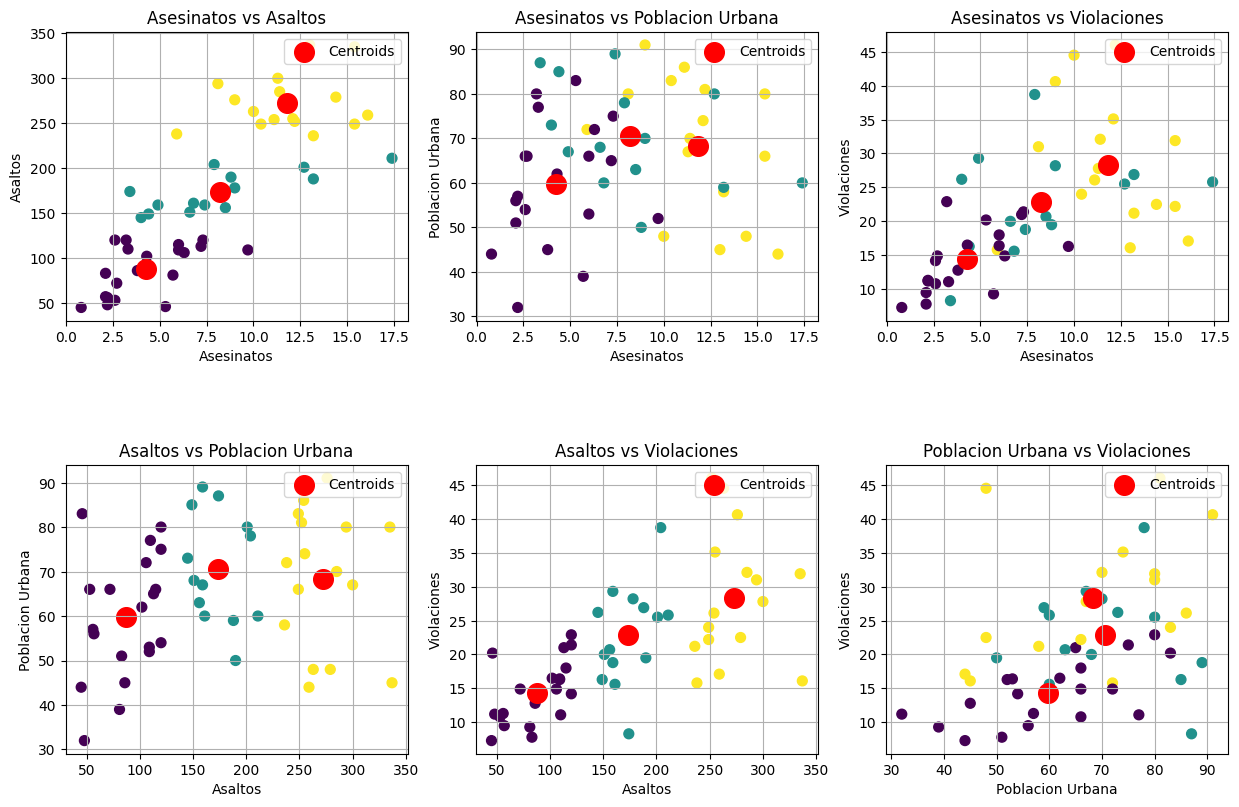

In [38]:
import itertools

feature_combinations = list(itertools.combinations(df_crimenes.columns[1:], 2))  # Excluye la columna 'Estado'

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_crimenes.iloc[:, 1:])

fig, axes = plt.subplots(nrows=len(feature_combinations) // 3 + 1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, feature_combination in enumerate(feature_combinations):
    row, col = i // 3, i % 3
    feature1, feature2 = feature_combination
    ax = axes[row, col]

    ax.scatter(df_crimenes[feature1], df_crimenes[feature2], c=kmeans.labels_, cmap='viridis', s=50)
    ax.scatter(kmeans.cluster_centers_[:, df_crimenes.columns.get_loc(feature1) - 1],
               kmeans.cluster_centers_[:, df_crimenes.columns.get_loc(feature2) - 1],
               s=200, c='red', marker='o', label="Centroids")

    ax.set_title(f'{feature1} vs {feature2}')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.legend(loc='upper right')
    ax.grid(True)

for i in range(len(feature_combinations), len(axes.flat)):
    fig.delaxes(axes.flat[i])

plt.show()


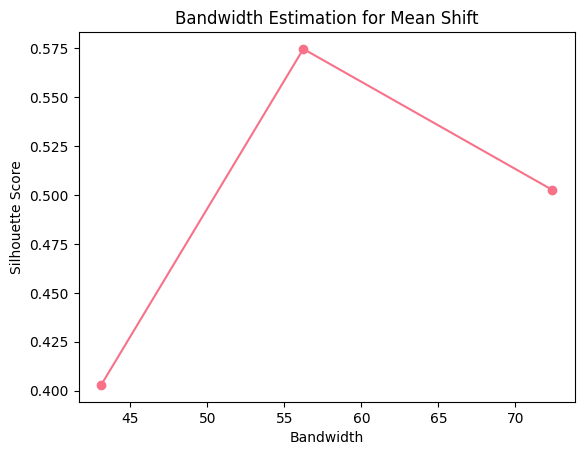

In [53]:
from sklearn.cluster import estimate_bandwidth

def estimate_bandwidth_meanshift(data, quantile_range=(0.2, 0.5), step=0.1):
    bandwidths = []
    silhouettes = []

    quantiles = np.arange(quantile_range[0], quantile_range[1], step)

    for quantile in quantiles:
        bandwidth = estimate_bandwidth(data, quantile=quantile)
        bandwidths.append(bandwidth)

        ms = MeanShift(bandwidth=bandwidth).fit(data)
        if len(np.unique(ms.labels_)) > 1:
            sil_score = silhouette_score(data, ms.labels_)
            silhouettes.append(sil_score)
        else:
            silhouettes.append(-1)

    plt.plot(bandwidths, silhouettes, 'o-')
    plt.xlabel("Bandwidth")
    plt.ylabel("Silhouette Score")
    plt.title("Bandwidth Estimation for Mean Shift")
    plt.show()

estimate_bandwidth_meanshift(df_crimenes)

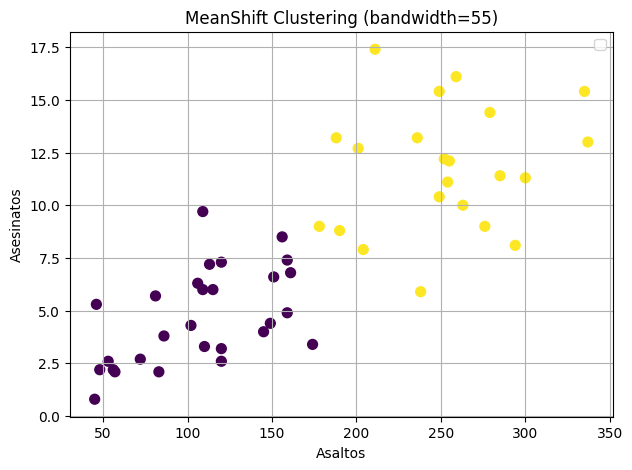

In [56]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Aplicar MeanShift con bandwidth=1.6
bandwidth =55
ms = MeanShift(bandwidth=bandwidth).fit(df_crimenes)
labels = ms.labels_

# Graficar los resultados
plt.figure(figsize=(7, 5))
plt.scatter(df_crimenes['Asaltos'], df_crimenes['Asesinatos'], c=labels, s=50, cmap='viridis')
# plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title(f'MeanShift Clustering (bandwidth={bandwidth})')
plt.xlabel("Asaltos")
plt.ylabel("Asesinatos")
plt.legend()
plt.grid(True)
plt.show()